# Estructura de la red
La red de bicicletas puede ser considerada como una estructura de procesamiento de informacion donde los nodos son las unidades de procesamiento y el camino que los vincula, la conexión.

Estructura de la red:
    
    1) NODOS: Estaciones
    2) CONEXION (edge): Camino | Recorrido | Calles
    3) PESOS (intensidad de la conexion): cantidad de usuarios? | tiempo de uso? | distancia en km?
    4) DIRECCIONALIDAD: Dirigido o No dirigido?  Podria pensarse como dirigido o dirigido reciproco con self-loops
    5) TAMAÑO
    

In [1]:
# librerias 
import pandas as pd
#import geopandas as gpd
import numpy as np

In [2]:
# librerias 
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
#nx.test()

In [4]:
import seaborn as sns

In [5]:
pwd

'/home/human/Dropbox/doctorado/chapter00_courses/network_science_sarraute/spiderman/martin'

### Import Data

In [6]:
df18 = pd.read_csv('/home/human/Dropbox/doctorado/chapter00_courses/network_science_sarraute/spiderman/martin/caba_bicis_2018_recorridos.csv',infer_datetime_format=True)

In [7]:
df18.head()

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad
0,5453,2018-01-01 00:08:05,0 days 00:19:53.000000000,Uruguay,45,Virrey Cevallos,183,M,45
1,673,2018-01-01 00:18:05,0 days 00:26:19.000000000,Posadas,189,Guardia Vieja,110,M,61
2,179119,2018-01-01 00:20:14,0 days 00:27:39.000000000,Hospital Rivadavia,50,Padilla,31,F,52
3,400147,2018-01-01 00:20:22,0 days 00:48:51.000000000,Macacha Güemes,111,Acuña de Figueroa,54,M,27
4,400156,2018-01-01 00:20:31,0 days 00:49:27.000000000,Macacha Güemes,111,Acuña de Figueroa,54,F,27


In [8]:
df18.shape

(2619968, 9)

In [9]:
df18.bici_tiempo_uso.iloc[27]

'0 days 01:45:22.000000000'

In [10]:
int(df18.bici_tiempo_uso.iloc[27][7:9])*60 + int(df18.bici_tiempo_uso.iloc[27][10:12])

105

### Armar el Grafo

In [11]:
# Instanciamos un grafo direccionado
D = nx.Graph()
type(D)

networkx.classes.graph.Graph

In [12]:
# Cada estacion es un nodo. Cada viaje entre estaciones es un arco.
# Funcion para crear edges en una red de transporte

def viajes_e_nodos(df, columna1, columna2):
    '''
    Devuelve los extremos conectados por un vinculo (edge)
    '''
    
    origen = df[columna1]
    destino = df[columna2]
    
    vinculados = zip(origen,destino)
    
    return list(vinculados)

In [13]:
edges = viajes_e_nodos(df18, 'bici_estacion_origen', 'bici_estacion_destino')

In [20]:
np.shape(edges)

(2619968, 2)

In [21]:
# Cada estacion es un nodo. Cada viaje entre estaciones es un arco.
# Funcion para crear edges en una red de transporte

def tiempo_e_estaciones(df, columna1, columna2):
    '''
    Devuelve los extremos conectados por un vinculo (edge)
    '''
    
    origen = df[columna1]
    destino = df[columna2]
    
    vinculados = zip(origen,destino)
    
    return list(vinculados)

In [22]:
# Creamos una lista de edges (estacion_n, estacion_k)
D.add_edges_from(edges)

In [23]:
len(D.edges())

19721

In [25]:
#D.edges()

In [26]:
len(D.nodes())

201

In [27]:
agrupado1 = df18.groupby(['bici_nombre_estacion_origen','bici_nombre_estacion_destino']).size().reset_index(name='recorridos')
agrupado1.columns = ['origen','destino','recorridos']

In [28]:
agrupado1.head()

,origen,destino,recorridos
0,15 de Noviembre,15 de Noviembre,494
1,15 de Noviembre,25 de Mayo,2
2,15 de Noviembre,9 de Julio,7
3,15 de Noviembre,Acevedo,26
4,15 de Noviembre,Acuña de Figueroa,10


In [74]:
np.argmax(agrupado1.recorridos)

/home/human/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


23386

/home/human/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


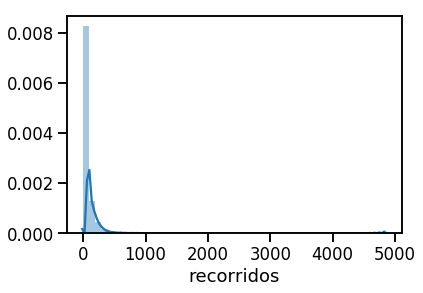

In [76]:
sns.distplot(agrupado1.recorridos)
plt.show()

In [77]:
agrupado1.loc[agrupado1.recorridos > 2000]

,origen,destino,recorridos
5653,Carlos Calvo,Carlos Calvo,2852
7626,Congreso,Congreso,2224
10376,Ecoparque,Ecoparque,2460
11755,Facultad de Derecho,Facultad de Derecho,2293
13504,Godoy Cruz y Libertador,Godoy Cruz y Libertador,4030
17946,Juana Manso,Juana Manso,3868
18144,Julieta Lanteri,Julieta Lanteri,3003
18339,Julián Álvarez,Julián Álvarez,2038
19856,Macacha Güemes,Macacha Güemes,2011
21425,Ministerio de Justicia y Seguridad,Ministerio de Justicia y Seguridad,2251


In [30]:
agrupado1.shape

(38333, 3)

In [31]:
#agrupado1.to_csv('grafo_bicis_18.csv')

In [32]:
#nx.from_edgelist()

In [33]:
# Se crea una funcion para generar el grafo de la red de transporte
def graphmaker(df, origen, destino):
    '''
    Devuelve un grafo compuesto por estaciones(nodos) y recorridos(vinculos) para cada dataframe.
    ...
    Argumentos:
    
    df = dataframe de recorridos
    origen = Serie del dataframe referenciando la estacion de origen del grafo
    destino = Serie del dataframe referenciando la estacion de destino del grafo
    '''
    agrupado = df.groupby([origen,destino]).size().reset_index(name='recorridos')
    agrupado.columns = ['origen','destino','recorridos']
    #bicigrafo = nx.from_pandas_edgelist(agrupado,'origen','destino','recorridos')
    bicigrafo = nx.convert_matrix.from_pandas_edgelist(agrupado,'origen','destino','recorridos')
    return bicigrafo

In [34]:
# Aplicamos la funcion para cada dataset y asi obtenemos el grafo de la red de bicicletas de cada año
# bicigrafo 2015
b18 = graphmaker(df18,'bici_nombre_estacion_origen','bici_nombre_estacion_destino')

In [35]:
b18.get_edge_data("15 de Noviembre","25 de Mayo")

{'recorridos': 7}

In [36]:
# 1) Cantidad de nodos(estaciones) y ejes(recorridos) de cada dataset
n18, e18 = len(b18.nodes()), len(b18.edges())

In [37]:
n18

199

In [38]:
e18

19574

## Matriz de Adyacencia

In [39]:
b18.adjacency

<bound method Graph.adjacency of <networkx.classes.graph.Graph object at 0x7fafa7f9c3c8>>

In [40]:
b18_adj = nx.adjacency_matrix(b18, weight = 'recorridos')

In [41]:
b18_adjmat = b18_adj.todense()
b18_adjmat

matrix([[ 494,    7,   12, ...,    3,    1,    0],
        [   7, 1246,   62, ...,    1,   31,    0],
        [  12,   62,  308, ...,    0,   34,    0],
        ...,
        [   3,    1,    0, ...,  425,    5,    0],
        [   1,   31,   34, ...,    5,  385,    0],
        [   0,    0,    0, ...,    0,    0,    5]], dtype=int64)

In [42]:
np.shape(b18_adjmat)

(199, 199)

In [43]:
np.fill_diagonal(b18_adjmat, 0)

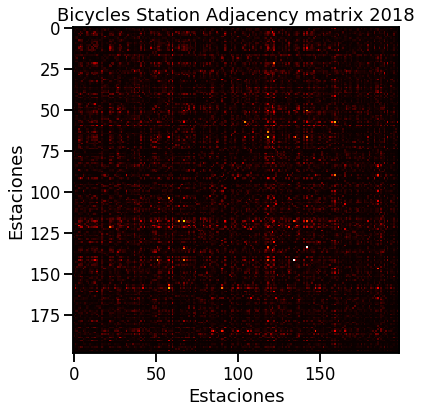

In [44]:
sns.set_context("talk")
#plt.(b18_adjmat)
plt.figure(figsize=(10,6))
plt.imshow(b18_adjmat, cmap='hot', interpolation='nearest')
plt.title("Bicycles Station Adjacency matrix 2018")
plt.grid(False)
plt.xlabel("Estaciones")
plt.ylabel("Estaciones")
plt.show()

In [45]:
D = np.diag(np.sum(b18_adjmat, axis = 1))

In [46]:
L = D - b18_adjmat

### Spectral Clustering

In [52]:
from sklearn.cluster import SpectralClustering
from sklearn import metrics
np.random.seed(0)

In [53]:
sc = SpectralClustering(3, affinity='precomputed', n_init=100)
sc.fit(b18_adjmat)

SpectralClustering(affinity='precomputed', assign_labels='kmeans', coef0=1,
          degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=3, n_init=100, n_jobs=1,
          n_neighbors=10, random_state=None)

In [54]:
print('spectral clustering')
print(sc.labels_)

spectral clustering
[1 0 0 1 2 2 0 0 1 2 0 2 2 2 2 1 1 0 0 0 0 0 2 2 1 0 0 1 1 2 1 1 0 2 0 0 0
 0 0 0 0 2 0 2 0 0 0 2 1 1 1 2 2 2 0 0 0 2 2 0 2 1 1 1 2 0 1 2 1 2 1 2 1 1
 2 0 1 1 1 1 1 2 1 1 0 0 0 1 1 0 0 0 2 2 0 1 0 0 1 0 0 0 0 2 2 0 0 0 0 2 1
 0 0 1 2 0 1 1 2 1 0 1 2 0 1 1 1 1 1 1 0 2 0 0 2 2 1 1 0 0 2 0 2 0 2 2 1 0
 0 2 2 1 1 0 1 1 2 0 0 0 1 2 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 2 1 0 0 1 0
 0 1 0 1 1 0 2 0 0 0 1 1 0 0]


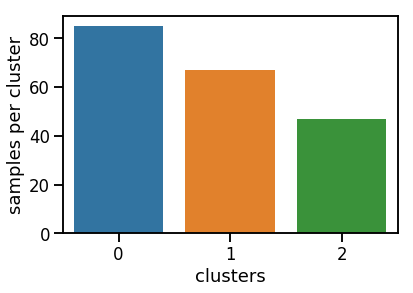

In [55]:
sns.countplot(sc.labels_)
plt.xlabel("clusters")
plt.ylabel("samples per cluster")
plt.show()

In [56]:
from numpy import linalg as LA
w, v = LA.eig(b18_adjmat)
#w, v = LA.eig(L)

In [57]:
np.shape(v)

(199, 199)

In [58]:
np.shape(np.ravel(v[sc.labels_==0,0]))

(85,)

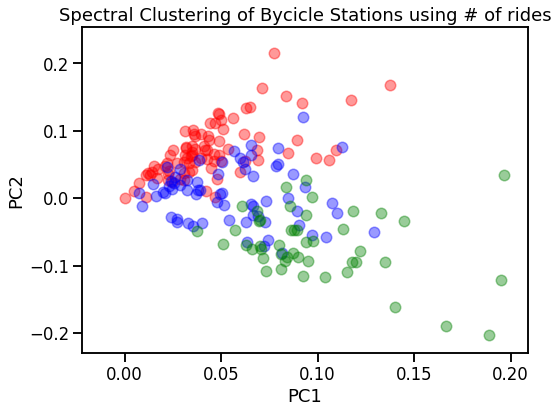

In [61]:
sns.set_context("talk")
plt.figure(figsize=(8,6))
plt.scatter(np.ravel(v[sc.labels_==0,0]),np.ravel(v[sc.labels_==0,1]), c = 'r', alpha = 0.4, s = 110)
plt.scatter(np.ravel(v[sc.labels_==1,0]),np.ravel(v[sc.labels_==1,1]), c = 'b', alpha = 0.4, s = 110)
plt.scatter(np.ravel(v[sc.labels_==2,0]),np.ravel(v[sc.labels_==2,1]), c = 'g', alpha = 0.4, s = 110)
#plt.scatter(np.ravel(v[sc.labels_==3,0]),np.ravel(v[sc.labels_==3,1]), c = 'y', alpha = 0.4, s = 80)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Spectral Clustering of Bycicle Stations using # of rides")
plt.grid(False)
plt.show()

In [62]:
nodes = list(b18.nodes)

In [63]:
#nodes[(sc.labels_ == 0)[]]

### Analisis de comunidades

In [72]:
data_estaciones = pd.read_csv('/home/human/Dropbox/doctorado/chapter00_courses/network_science_sarraute/spiderman/martin/data_estaciones.csv',infer_datetime_format=True)

In [73]:
data_estaciones.head()

,long,lat,nombre,domicilio,imagen,automat,observ,nro_est,horario,dire_norm
0,-58.392452,-34.583133,Facultad de Derecho,Av. Pres.Figueroa Alcorta y Juan A.Bibiloni,estacion_automatica.png,AUTOMÁTICA,Abril 2015 (pasó de ser Manual a Automática),1,Estación automática: disponibilidad las 24 horas,"FIGUEROA ALCORTA, PRES. AV. y BIBILONI, JUAN A."
1,-58.374822,-34.592589,Retiro,Av. Dr.Jose Ramos Mejia y Del Libertador Av,estacion_automatica.png,AUTOMÁTICA,Abril 2015 (pasó de ser Manual a Automática),2,Estación automática: disponibilidad las 24 horas,"DEL LIBERTADOR AV. y RAMOS MEJIA, JOSE MARIA, ..."
2,-58.368918,-34.611242,Aduana,Av. Ing.Huergo y Av. Belgrano,estacion_automatica.png,AUTOMÁTICA,Abril 2015 (pasó de ser Manual a Automática),3,Estación automática: disponibilidad las 24 horas,"HUERGO, ING. AV. y BELGRANO AV."
3,-58.368950,-34.601721,Plaza Roma,Lavalle y Bouchard,estacion_automatica.png,AUTOMÁTICA,Abril 2015 (pasó de ser Manual a Automática),4,Estación automática: disponibilidad las 24 horas,LAVALLE y BOUCHARD
4,-58.369709,-34.628301,Parque Lezama,Av Martín García e Irala,estacion_automatica.png,AUTOMÁTICA,Abril 2015 (pasó de ser Manual a Automática),6,Estación automática: disponibilidad las 24 horas,"GARCIA, MARTIN AV. e IRALA"


In [64]:
from itertools import compress
nodes_cluster0 = list(compress(nodes, (sc.labels_ == 0)))
nodes_cluster1 = list(compress(nodes, (sc.labels_ == 1)))
nodes_cluster2 = list(compress(nodes, (sc.labels_ == 2)))

### Que estaciones estan dentro de cada comunidad?

In [65]:
# microcentro, constitucion y la boca 
nodes_cluster0

['25 de Mayo',
 '9 de Julio',
 'Aime Paine',
 'Alsina',
 'Arenales',
 'Ayacucho',
 'Azopardo y Chile',
 'Azucena Villaflor',
 'Balcarce',
 'Belgrano',
 'Bouchard',
 'Brasil',
 'Catedral',
 'Cerrito',
 'Chile',
 'Colegio Nacional Buenos Aires',
 'Congreso',
 'Congreso II',
 'Constitucion I',
 'Constitucion II',
 'Corrientes',
 'Córdoba',
 'Della Paolera',
 'Diagonal Norte',
 'Esmeralda',
 'Esmeralda y Corrientes',
 'Estados Unidos',
 'Facultad de Ingenieria',
 'Galerías Pacífico',
 'Hospital Argerich',
 'Humberto 1º',
 'Independencia',
 'Ingeniero Butty',
 'Juan Manuel Blanes',
 'Juana Manso',
 'Julieta Lanteri',
 'La Boca',
 'Lavalle',
 'Legislatura',
 'Lima',
 'Macacha Güemes',
 'Madero UCA',
 'Maipú',
 'Marcelo T. de Alvear',
 'Ministerio de Economía',
 'Ministerio de Educacion',
 'Ministerio de Justicia y Seguridad',
 'Montevideo',
 'Moreno',
 'Obelisco',
 'Paraná',
 'Parque Lezama',
 'Perón',
 'Piedras',
 'Pinzon y M. Rodriguez',
 'Plaza Cecilia Grierson',
 'Plaza Garay',
 'Plaza H

In [66]:
# balvanera
# boedo
# san cristobal
# parque patricios
nodes_cluster1

['15 de Noviembre',
 'Acevedo',
 'Aranguren',
 'Av. Pavon y 33 Orientales',
 'Avelino Diaz',
 'Billinghurst y Valentin Gomez',
 'Carlos Calvo',
 'Carlos Gardel',
 'Castro y Mexico',
 'Catamarca',
 'Doblas',
 'Don Bosco',
 'EEUU y Boedo',
 'Facultad de Psicologia',
 'Federico Lacroze',
 'Fitz Roy',
 'Gallo',
 'Guardia Vieja',
 'Guayaquil',
 'Guzmán',
 'Hipolito Yrigoyen',
 'Hospital Británico',
 'Hospital Francés',
 'Hospital Garrahan',
 'Hospital Italiano',
 'Hospital Ramos Mejía',
 'Hospital Sarda',
 'Humahuaca',
 'Instituto Leloir',
 'Jose Marmol',
 'Las casas',
 'Lerma',
 'Misiones',
 'México',
 'Once',
 'Once II',
 'Padilla',
 'Parque Centenario',
 'Parque Patricios',
 'Parque Rivadavia',
 'Pasco',
 'Pasteur',
 'Pedro Echague',
 'Peron y F. Acuña de Figueroa',
 'Plaza Almagro',
 'Plaza Boedo',
 'Plaza Primero de Mayo',
 'Pque. Jose Evaristo Uriburu',
 'Pueyrredón',
 'Quintino Bocayuva',
 'Ravignani',
 'Rincón',
 'Roseti',
 'Saavedra',
 'Salcedo',
 'Sarandí',
 'Senillosa',
 'Senillo

In [67]:
# palermo
# barrio norte
# recoleta
nodes_cluster2

['Acuña de Figueroa',
 'Agüero',
 'Araoz',
 'Arenales y Aguero',
 'Armenia',
 'Armenia y Gorriti',
 'Austria y French',
 'Billinghurst',
 'Billinghurst y Mansilla',
 'Castillo',
 'Cementerio de la Recoleta',
 'Coronel Díaz',
 'Costa Rica',
 'Distrito Audiovisual',
 'Ecoparque',
 'Ecuador',
 'Emilio Mitre',
 'F. J. Santamaría de Oro',
 'Facultad de Derecho',
 'Facultad de Medicina',
 'Fitz Roy y Gorriti',
 'Godoy Cruz y Libertador',
 'Guatemala',
 'Gutierrez',
 'Hospital Alemán',
 'Hospital Rivadavia',
 'Julián Álvarez',
 'Juncal',
 'Malabia',
 'Malba',
 'Ministro Carranza',
 'Nicaragua',
 'Pacífico',
 'Parque Las Heras',
 'Peña',
 'Planetario',
 'Plaza Alemania',
 'Plaza Güemes',
 'Plaza Italia',
 'Plaza Monseñor Miguel De Andrea',
 'Plaza Palermo Viejo',
 'Plaza Vicente López',
 'Posadas',
 'Ravignani y Guatemala',
 'Riobamba',
 'Ugarteche',
 'Cabello']

In [69]:
#from networkx.algorithms.community import greedy_modularity_communities
#c = list(greedy_modularity_communities(b18))

In [71]:
#sorted(c[0])